In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random

from math import sin

In [86]:
"""NOTES

Of importance for reference is the "physics" examples embedded in papers [ 8, 9, 10, 11 ]

"""

### Definitions

N = 100
r: np.ndarray = np.linspace(start=0, stop=N) # Projectile position array
v: np.ndarray = np.linspace(start=0, stop=N) # Projectile velocity array

###  Initial Conditions

# (X, Y) "Front" endpoint of beam (Spiggot location). Length of the front beam.
l_1: np.ndarray = np.asarray([0.0, 0.0])

# (X, Y) "Back" endpoint of beam (Hinge location). Length of the back beam.
l_2: np.ndarray = np.asarray([0.0, 0.0])

# (X, Y) Arm endpoint, mass "sling" location. Length of the arm.
l_3: np.ndarray = np.asarray([0.0, 0.0])

# (X, Y) Sling Length.
l_4: np.ndarray = np.asarray([0.0, 0.0])

# Angle of the beam relative to the support. Measured in radians.
initial_theta = 0.55

# Angle of the spiggot relative to the sling. Measured in radians.
initial_sigma = 0.1

# Angle of the hinge relative to the counterweight. Measured in radians.
initial_psi = 0.1




A description of the initial conditions naming scheme of a counterweight trebuchet.

The sling is a little hard to see in this picture, but it's effectively a wooden segment
laid against the base of the trebuchet. It's easier to see in the irl visual example.

![Figure!](assets/Figure1.png)

The aforementioned visual example.

Notice the sling agsint the ground. Counterintuitively, the "spigot" does not exist in
this picture at all. In fact, this seems to be something made up for the paper. More
research likely needs to be conducted.

![image](assets/counterweight-trebuchet-example.png)

A set of spigot configurations.

![Sling and spigot view](assets/Figure3.png)


In [87]:
""" NOTES

This next section attempts to follow alongside the paper

"The swinging counterweight trebuchet
Experiments on inner movement and ranges"
- (Erik Horsdal, Et al.)

Initial conditions are specified to the values laid out in the paper, and justified when
necessary.

"""

# Distance from the midway between axle and ring
l_1_mag_cm = 97.5

# Vertical distance from the lower side of the beam in horizontal position to projectile
l_4_mag_cm = 87.0

# Initial spigot position is specified by alpha in radians
alpha_rad = 0

# Eccentricity value
e = 0.04

# Experimentation constant (poor science, it's unexplained. Gross.)
k = 1 # arbitrary, used for data fitting.

### START SIMULATION FUNCTIONS ###########################################################

# The general wave equation with the assumption that position is 0 (relative)
def gw_eq(
    A: float, phase_angle: float, phase_offset: float, sample_idx: int
) -> float:
    return A * sin(phase_angle * sample_idx + phase_offset)


### END SIMULATION FUNCTIONS #############################################################

# TODO: How do the experimental results look for this?

random_theta_angular_vel = random.random()
random_psi_angular_vel = random.random()
random_sigma_angular_vel = random.random()

experimental_theta = [gw_eq(1, random_theta_angular_vel, 0.0, i) for i in range(N)]
experimental_psi   = [gw_eq(1, random_psi_angular_vel, 0.0, i) for i in range(N)]
experimental_sigma = [gw_eq(1, random_sigma_angular_vel, 0.0, i) for i in range(N)]

### START COORDINATE FUNCTIONS ###########################################################

def calculate_theta(sample_idx: int):
    return (k * experimental_theta[sample_idx]) + initial_theta

def calculate_psi(sample_idx: int):
    return experimental_psi[sample_idx] + (k * experimental_theta[sample_idx])

def calculate_sigma(sample_idx: int):
    return experimental_sigma[sample_idx] + (k * experimental_theta[sample_idx])


### END COORDINATE FUNCTIONS #############################################################

# Simulation data

sample_indices   = np.array(list(range(0, N)))
coordinate_psi   = np.array([0.0 for _ in range(N)])
coordinate_sigma = np.array([0.0 for _ in range(N)])
coordinate_theta = np.array([0.0 for _ in range(N)])

print("Simulating....")
trebuchet_released = False
max_sigma = float('-inf')
for idx in sample_indices:
    if (idx % 10 == 0):
        print(f"{idx}/{N}")

    coordinate_theta[idx] = (calculate_theta(idx))
    coordinate_psi[idx] = (calculate_psi(idx))
    coordinate_sigma[idx] = (calculate_sigma(idx))

    max_sigma = max(coordinate_sigma[idx], max_sigma)

    if np.isclose(coordinate_sigma[idx], (np.pi / 2) + initial_theta):
        print(f"Trebuchet released at sample {idx}")
        trebuchet_released = True
        break

if (not trebuchet_released):
    print(f"Failed to release trebuchet... :<\n\t - Maximum angular vel: {max_sigma}")


Simulating....
0/100
10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100
Failed to release trebuchet... :<
	 - Maximum angular vel: 1.9828302597300187


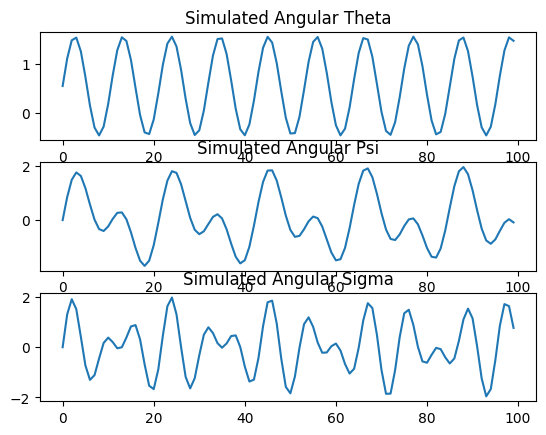

In [88]:
"""NOTE

With the simulation setup in this manner, we can plot the above to get an idea of how the
function evolves over time. 

Importantly, because both k and experimental data are guarded, and we don't have access,
it becomes a little annoying seeing something relevant beyond whatever we can find.

"""

fig, axs = plt.subplots(nrows=3, ncols=1)

axs[0].set_title('Simulated Angular Theta')
axs[0].plot(sample_indices, coordinate_theta)

axs[1].set_title('Simulated Angular Psi')
axs[1].plot(sample_indices, coordinate_psi)

axs[2].set_title('Simulated Angular Sigma')
axs[2].plot(sample_indices, coordinate_sigma)